<h1 style="text-align: center;">VGG16</h1>

## Loading the required libraries

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

## Loading the CIFAR-10 dataset

In [12]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

## Creating the VGG16 model from a scratch

In [13]:
def create_vgg16_scratch():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),

        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),

        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=(2, 2)),

        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

## Training the model

In [14]:
vgg16_scratch = create_vgg16_scratch()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
vgg16_scratch.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
scratch_history = vgg16_scratch.fit(
    train_images, train_labels,
    epochs=60,
    validation_data=(test_images, test_labels)
)

Epoch 1/60
1563/1563 [==============================] - 64s 37ms/step - loss: 1.8912 - accuracy: 0.2441 - val_loss: 1.5978 - val_accuracy: 0.3817
Epoch 2/60
1563/1563 [==============================] - 57s 36ms/step - loss: 1.4103 - accuracy: 0.4617 - val_loss: 1.2588 - val_accuracy: 0.5247
Epoch 3/60
1563/1563 [==============================] - 56s 36ms/step - loss: 1.0836 - accuracy: 0.6093 - val_loss: 1.0235 - val_accuracy: 0.6393
Epoch 4/60
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8702 - accuracy: 0.6949 - val_loss: 0.8949 - val_accuracy: 0.6982
Epoch 5/60
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7151 - accuracy: 0.7542 - val_loss: 0.8120 - val_accuracy: 0.7282
Epoch 6/60
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6010 - accuracy: 0.7968 - val_loss: 0.7259 - val_accuracy: 0.7592
Epoch 7/60
1563/1563 [==============================] - 56s 36ms/step - loss: 0.4920 - accuracy: 0.8323 - val_loss: 0.7919 -

## Printing the training and testing accuracy

In [15]:
train_loss = scratch_history.history['loss']
train_acc = scratch_history.history['accuracy']
val_loss = scratch_history.history['val_loss']
val_acc = scratch_history.history['val_accuracy']

print(f"Final Training Accuracy: {train_acc[-1]*100:.2f}%")
print(f"Final Testing Accuracy: {val_acc[-1]*100:.2f}%")

Final Training Accuracy: 99.17%
Final Testing Accuracy: 81.05%


## Plotting the accuracy and loss

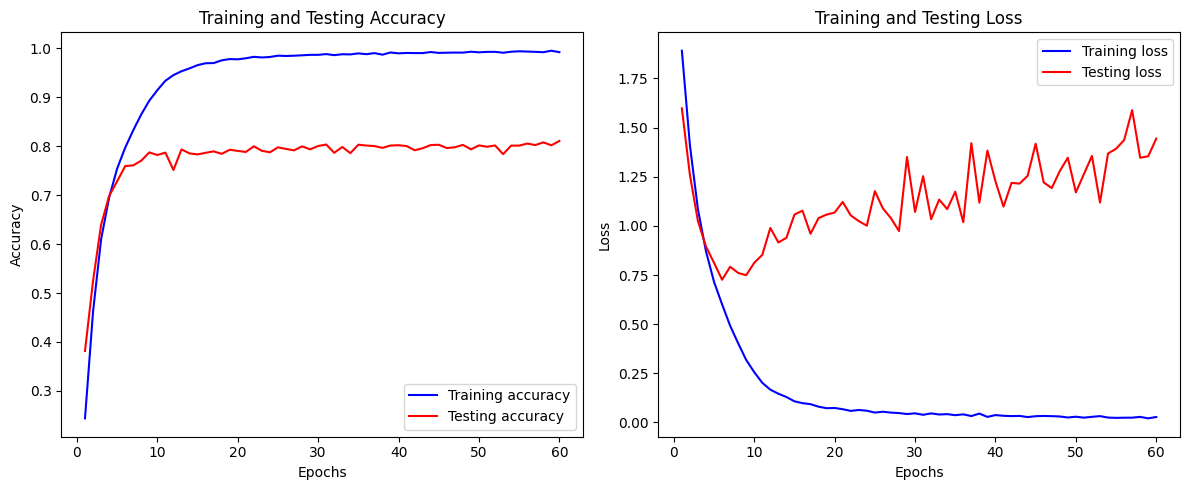

In [16]:
import matplotlib.pyplot as plt
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Testing accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Testing loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()